In [1]:
import yfinance as yf
import pandas as pd

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500.to_csv("sp500.csv")

In [3]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


<AxesSubplot:xlabel='Date'>

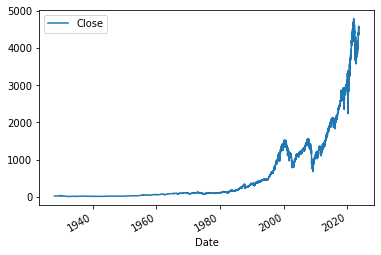

In [4]:
sp500.plot.line(y='Close',use_index=True)

In [5]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [6]:
sp500.shape

(24024, 5)

In [7]:
sp500 = sp500.loc["1990-01-01":].copy()

In [8]:
sp500.shape

(8474, 5)

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995


In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [13]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [23]:
from sklearn.metrics import precision_score,accuracy_score

In [27]:
accuracy=[]

from sklearn.tree import DecisionTreeClassifier
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)
DT_acc=accuracy_score(train[predictors], preds)
accuracy.append(DT_acc)
print(DT_acc,'% Accurate')

ValueError: Found input variables with inconsistent numbers of samples: [8374, 100]

In [16]:
model = DecisionTreeClassifier()

model.fit(train[predictors], train["Target"])

DecisionTreeClassifier()

In [17]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5614035087719298

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(train[predictors], train["Target"])

LogisticRegression()

In [19]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.52

In [20]:
from sklearn.naive_bayes import BernoulliNB 
model = BernoulliNB()

model.fit(train[predictors], train["Target"])

BernoulliNB()

In [21]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.52